<a href="https://colab.research.google.com/github/sujit-168/ML-Demo-Keras/blob/main/%E4%BD%BF%E7%94%A8keras%E9%A2%84%E6%B5%8B%E7%B3%96%E5%B0%BF%E7%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


上传本地文件

In [ ]:
from google.colab import files
upload = files.upload()
for fn in uploaded.key():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn,length=len(uploaded[fn])))

In [ ]:
查看数据集

In [ ]:
with open("diabetes.csv",'w') as f:
  f.write(uploaded[uploaded.key()[0]])

安装Git，查看Git版本

In [ ]:
!apt install git
!git --version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.17.1-1ubuntu0.8).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
git version 2.17.1


从github上下载数据集

In [ ]:
!git clone https://hub.fastgit.org/sujit-168/Data-Collections.git

Cloning into 'Data-Collections'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 20 (delta 3), reused 15 (delta 3), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [ ]:
!cd sample_data/
!ls

Data-Collections  drive  sample_data


In [ ]:
# 导入数据处理及可视化工具
!python --version
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 导入数据集并查看部分数据
train_data=pd.read_csv('/content/Data-Collections/1.糖尿病预测数据集/diabetes.csv',encoding='utf-8')
train_data.head()

Python 3.7.10


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#python 自带csv读取库
#import csv
#csvFile = open('/content/sample_data/california_housing_train.csv', "r")
#dict_reader = csv.DictReader(csvFile)
#for row in dict_reader:
#    print(row)

In [ ]:
print("糖尿病的特征维度为：{}".format(train_data.shape))

糖尿病的特征维度为：(768, 9)


In [ ]:
print(train_data.groupby("Outcome").size())

Outcome
0    500
1    268
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


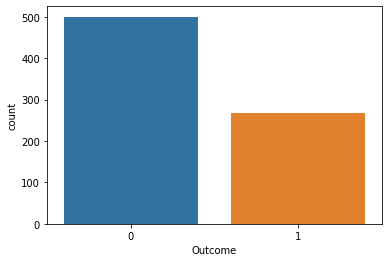

In [ ]:
sns.countplot(train_data["Outcome"],label="Count")

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
%cd Data-Collections/1.糖尿病预测数据集
!ls

/content/Data-Collections/1.糖尿病预测数据集
diabetes.csv


In [ ]:
from sklearn.model_selection import train_test_split
diabetes=train_data
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.loc[:, diabetes.columns != "Outcome"],
    diabetes["Outcome"], stratify=diabetes["Outcome"],
    random_state=66)

# KNN算法

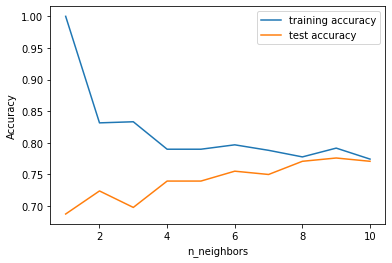

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(X_train,y_train)
  training_accuracy.append(knn.score(X_train,y_train))
  test_accuracy.append(knn.score(X_test,y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')


In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

print('Accuracy of K-NN classifier on training set:{:.2f}'.format(knn.score(X_train,y_train)))
print('Accuracy of K-NN classifier on training set:{:.2f}'.format(knn.score(X_test,y_test)))

Accuracy of K-NN classifier on training set:0.79
Accuracy of K-NN classifier on training set:0.78


#逻辑回归

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train,y_train)
print('Training set accuracy:{:.3f}'.format(logreg.score(X_train,y_train)))
print('Training set accuracy:{:.3f}'.format(logreg.score(X_test,y_test)))

Training set accuracy:0.785
Training set accuracy:0.771


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#决策树

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree =  DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print('Training set accuracy:{:.3f}'.format(knn.score(X_train,y_train)))
print('Training set accuracy:{:.3f}'.format(knn.score(X_test,y_test)))

Training set accuracy:0.792
Training set accuracy:0.776


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree =  DecisionTreeClassifier(random_state=0,max_depth=3)
tree.fit(X_train,y_train)
print('Training set accuracy:{:.3f}'.format(tree.score(X_train,y_train)))
print('Training set accuracy:{:.3f}'.format(tree.score(X_test,y_test)))

Training set accuracy:0.773
Training set accuracy:0.740


#随机森林

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier(random_state=0,n_estimators=100)
rf.fit(X_train,y_train)
print('Training set accuracy:{:.3f}'.format(rf.score(X_train,y_train)))
print('Training set accuracy:{:.3f}'.format(rf.score(X_test,y_test)))

Training set accuracy:1.000
Training set accuracy:0.786


In [ ]:
rf1 =  RandomForestClassifier(random_state=0,n_estimators=100,max_depth=3)
rf1.fit(X_train,y_train)
print('Training set accuracy:{:.3f}'.format(rf1.score(X_train,y_train)))
print('Training set accuracy:{:.3f}'.format(rf1.score(X_test,y_test)))

Training set accuracy:0.800
Training set accuracy:0.755
